# Introduction to Scikit Learn library

In [122]:
import github_command as gt

In [998]:
gt.push(file_to_transfer="TD4_Sklearn.ipynb", message="ElasticNet", repos="TDs_ESILV")

## Import du dataset

In [123]:
from sklearn import datasets

In [124]:
boston = datasets.load_boston()

In [125]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [126]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

discussion sur des critères discriminatoires : https://mail.python.org/pipermail/scikit-learn/2017-July/001683.html

## Récupérer x et y

In [861]:
X = boston.data

In [862]:
y = boston.target

In [863]:
X.shape, y.shape

((506, 13), (506,))

## Diviser en jeu de test et apprentissage

In [870]:
from sklearn.model_selection import train_test_split

In [871]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234)

In [872]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

On retrouve bien le splitage ratio

In [873]:
[tuple_[0]/X.shape[0] for tuple_ in (X_train.shape, X_test.shape, y_train.shape, y_test.shape)]

[0.7490118577075099,
 0.2509881422924901,
 0.7490118577075099,
 0.2509881422924901]

## Utilisation d'un modèle simplement

In [874]:
performances = dict()

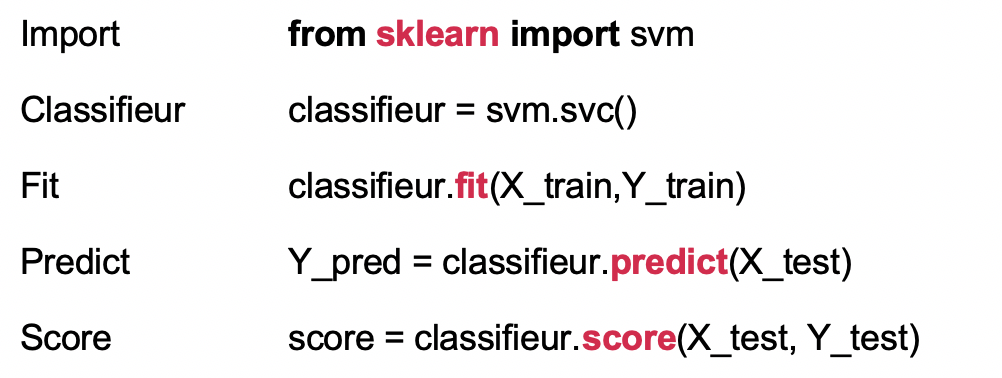

In [875]:
from IPython.display import Image
Image(filename="td4_ressources/img_sklearn.png", retina = True)

In [876]:
from sklearn.linear_model import LinearRegression

In [877]:
algorithme = LinearRegression()
algorithme.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [878]:
algorithme.score(X_test, y_test)

0.7323523347366852

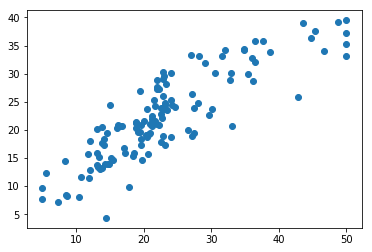

In [879]:
## Predictions against True values
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x=y_test, y=algorithme.predict(X_test))

In [880]:
algorithme.coef_

array([-9.66378735e-02,  6.31080432e-02, -1.38069045e-02,  2.84516261e+00,
       -2.19347661e+01,  2.40835980e+00,  2.45246610e-03, -1.89020994e+00,
        3.56217021e-01, -1.27942145e-02, -1.05991197e+00,  1.02040679e-02,
       -5.63773228e-01])

In [881]:
performances[algorithme] = algorithme.score(X_test, y_test)

But train/test split does have its dangers — what if the split we make isn’t random? 

Instead of algo1 we can use directly LinearRegression() as it will fit it anyway on the different splits

## Mettre tout ceci sous forme d'une fonction

In [932]:
def get_score(algorithme, X_train, X_test, y_train, y_test, display_graph=False, display_options=True):
    if display_options:
        print("fitting :\n"+ str(algorithme))
        print("X_train:{} , X_test:{} ,  y_train:{} ,  y_test:{}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))
    modele = algorithme.fit(X_train, y_train)
    score  = modele.score(X_test, y_test)
    if display:
        import matplotlib.pyplot as plt
        plt.scatter(x=y_test, y=algorithme.predict(X_test)) ## Predictions against True values
    return score

fitting :
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
X_train:(379, 13) , X_test:(127, 13) ,  y_train:(379,) ,  y_test:(127,)


0.7323523347366852

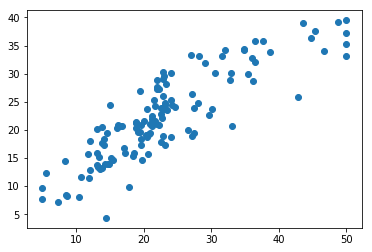

In [933]:
get_score(LinearRegression(), *train_test_split(X, y, random_state=1234))

## Avons-nous besoin de Standardizer les valeurs ? 

In [884]:
from sklearn.preprocessing import StandardScaler
scaler   = StandardScaler().fit(X_train)
X_train  = scaler.transform(X_train)
X_test   = scaler.transform(X_test)

In [885]:
get_score(LinearRegression(), X_train, X_test, y_train, y_test)

fitting :
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
X_train:(379, 13) , X_test:(127, 13) ,  y_train:(379,) ,  y_test:(127,)


0.7323523347366848

Pour une régression linéaire non. Expliquer pourquoi.

Mais c'est toujours mieux de le faire. Expliquer pourquoi.

## Cross validation

In [886]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [887]:
results = cross_val_score(LinearRegression(), X, y, cv=3)
display(results, results.mean(), results.std())

array([ 0.5828011 ,  0.53193819, -5.85104986])

-1.5787701857180003

3.021029289219623

In [888]:
results = cross_val_score(LinearRegression(), X, y, cv=5)
display(results, results.mean(), results.std())

array([ 0.63861069,  0.71334432,  0.58645134,  0.07842495, -0.26312455])

0.35074135093252234

0.3797094749826804

Attention : pas randomly selected

In [890]:
random_indexes = np.random.choice(range(0,np.size(X, axis=0)),size=np.size(X, axis=0),replace=False)
results = cross_val_score(LinearRegression(), 
                X[random_indexes,:],
                y[random_indexes],
                cv=5)
display(results, results.mean(), results.std())

array([0.62837885, 0.73350767, 0.74964312, 0.71077591, 0.78700539])

0.7218621885865057

0.05293972623910022

In [640]:
results = cross_val_score(LinearRegression(), X, y, cv=KFold(shuffle=True, n_splits=5))
display(results, results.mean(), results.std())

array([0.75741396, 0.65194331, 0.77086256, 0.71925798, 0.67222008])

0.7143395761930985

0.046350377005182485

In [562]:
def multiple_cross_val_scores(algorithme, X, y):
    import numpy as np
    results=dict()
    for kfold in range(3,100, 20):
        score = cross_val_score(algorithme, X, y,  cv = KFold(shuffle=True, n_splits=kfold), scoring='r2')
        results[kfold] = score.mean(), score.std()
    return results

In [563]:
test = multiple_cross_val_scores(DecisionTreeRegressor(),X, y)
test = pd.DataFrame(test, index=["mean", "std"]).T
test

,mean,std
3,0.769915,0.031168
23,0.694490,0.179229
43,0.577085,0.565091
63,0.530908,0.622607
83,0.423311,1.509752


In [585]:
new_index = [str(x) + " folds" for x in test.index]
test.index = new_index

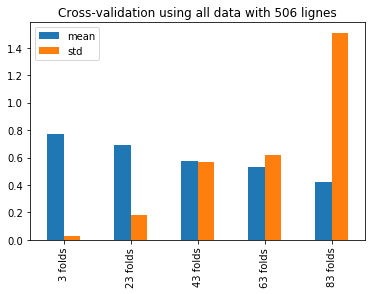

In [603]:
test.plot(kind='bar', title='Cross-validation using all data with {} lignes'.format(X.shape[0]))

There are cases where the computational definition of R2 can yield negative values, depending on the definition used. This can arise when the predictions that are being compared to the corresponding outcomes have not been derived from a model-fitting procedure using those data. Even if a model-fitting procedure has been used, R2 may still be negative, for example when linear regression is conducted without including an intercept, or when a non-linear function is used to fit the data. In cases where negative values arise, the mean of the data provides a better fit to the outcomes than do the fitted function values, according to this particular criterion.

The constant minimizing the squared error is the mean. Since you are doing cross validation with left out data, **it can happen that the mean of your test set is wildly different from the mean of your training set**

R² = 1 - RSS / TSS, where RSS is the residual sum of squares ∑(y - f(x))² and TSS is the total sum of squares ∑(y - mean(y))². Now for R² ≥ -1, it is required that RSS/TSS ≤ 2, but it's easy to construct a model and dataset for which this is not true:

***Inspect shuffling first ! If data is sorted at first !!! *** 

### Decision Tree Regressor

In [892]:
from sklearn.tree import DecisionTreeRegressor

In [894]:
algorithme = DecisionTreeRegressor()
algorithme.fit(X_train, y_train)
score = algorithme.score(X_test, y_test)
performances[algorithme] = score

### Random Forest example

In [895]:
from sklearn.ensemble import RandomForestRegressor
hyperparametres = {
    'n_estimators':30,
}
algorithme = RandomForestRegressor(**hyperparametres)
score = get_score(algorithme, X_train, X_test, y_train, y_test)
performances[algorithme] = score

fitting :
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
X_train:(379, 13) , X_test:(127, 13) ,  y_train:(379,) ,  y_test:(127,)


In [896]:
hyperparametres = {"n_estimators"  :  30, 
                   "max_features"  :  3,
                   "max_depth"     :  50,}
algorithme = RandomForestRegressor(**hyperparametres)
score = get_score(algorithme, X_train, X_test, y_train, y_test)
performances[algorithme] = score

fitting :
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
X_train:(379, 13) , X_test:(127, 13) ,  y_train:(379,) ,  y_test:(127,)


### ExtraTreesRegressor

In [897]:
from sklearn.ensemble import ExtraTreesRegressor

algorithme = ExtraTreesRegressor()
score      = get_score(algorithme, X_train, X_test, y_train, y_test)
performances[algorithme] = score

fitting :
ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)
X_train:(379, 13) , X_test:(127, 13) ,  y_train:(379,) ,  y_test:(127,)


utiliser n_jobs = -1 c'est mieux pour paralléliser quand on a plusieurs CPUs

### SVR 

In [898]:
from sklearn import svm
algorithme = svm.SVR(kernel = "linear")
score      = get_score(algorithme, X_train, X_test, y_train, y_test)
performances[algorithme] = score

fitting :
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
X_train:(379, 13) , X_test:(127, 13) ,  y_train:(379,) ,  y_test:(127,)


### catboost

installation : !pip install catboost

In [899]:
from catboost import CatBoostRegressor

In [900]:
algorithme = CatBoostRegressor(task_type="CPU")
modele     = algorithme.fit(X_train, y_train)
score      = algorithme.score(X_test, y_test)
performances['catboost'] = score

0:	learn: 8.7204719	total: 12.8ms	remaining: 12.8s
1:	learn: 8.5935783	total: 21.5ms	remaining: 10.7s
2:	learn: 8.4557656	total: 29.1ms	remaining: 9.67s
3:	learn: 8.3357630	total: 35.3ms	remaining: 8.79s
4:	learn: 8.2465306	total: 41.2ms	remaining: 8.19s
5:	learn: 8.1042568	total: 47.1ms	remaining: 7.81s
6:	learn: 7.9615200	total: 53.1ms	remaining: 7.54s
7:	learn: 7.8307277	total: 59.2ms	remaining: 7.34s
8:	learn: 7.7104981	total: 65ms	remaining: 7.16s
9:	learn: 7.5944429	total: 71.1ms	remaining: 7.04s
10:	learn: 7.4960127	total: 77.1ms	remaining: 6.93s
11:	learn: 7.3870638	total: 83.2ms	remaining: 6.85s
12:	learn: 7.2733017	total: 89.3ms	remaining: 6.78s
13:	learn: 7.1945331	total: 95.1ms	remaining: 6.7s
14:	learn: 7.0865563	total: 101ms	remaining: 6.61s
15:	learn: 6.9746485	total: 106ms	remaining: 6.53s
16:	learn: 6.8940218	total: 112ms	remaining: 6.47s
17:	learn: 6.8365102	total: 117ms	remaining: 6.41s
18:	learn: 6.7667920	total: 124ms	remaining: 6.42s
19:	learn: 6.6802493	total: 13

166:	learn: 2.6527745	total: 1.19s	remaining: 5.92s
167:	learn: 2.6462910	total: 1.19s	remaining: 5.92s
168:	learn: 2.6259732	total: 1.2s	remaining: 5.9s
169:	learn: 2.6144806	total: 1.21s	remaining: 5.9s
170:	learn: 2.6073851	total: 1.22s	remaining: 5.89s
171:	learn: 2.5985368	total: 1.22s	remaining: 5.88s
172:	learn: 2.5947585	total: 1.23s	remaining: 5.87s
173:	learn: 2.5882597	total: 1.23s	remaining: 5.86s
174:	learn: 2.5734787	total: 1.24s	remaining: 5.85s
175:	learn: 2.5626087	total: 1.25s	remaining: 5.83s
176:	learn: 2.5559951	total: 1.25s	remaining: 5.82s
177:	learn: 2.5502860	total: 1.26s	remaining: 5.81s
178:	learn: 2.5438083	total: 1.26s	remaining: 5.8s
179:	learn: 2.5358585	total: 1.27s	remaining: 5.79s
180:	learn: 2.5301336	total: 1.28s	remaining: 5.77s
181:	learn: 2.5186205	total: 1.28s	remaining: 5.76s
182:	learn: 2.5082795	total: 1.29s	remaining: 5.75s
183:	learn: 2.4971809	total: 1.29s	remaining: 5.74s
184:	learn: 2.4909010	total: 1.3s	remaining: 5.72s
185:	learn: 2.482

325:	learn: 1.8678864	total: 2.16s	remaining: 4.47s
326:	learn: 1.8657026	total: 2.17s	remaining: 4.47s
327:	learn: 1.8640586	total: 2.18s	remaining: 4.46s
328:	learn: 1.8624392	total: 2.18s	remaining: 4.45s
329:	learn: 1.8603490	total: 2.19s	remaining: 4.45s
330:	learn: 1.8560584	total: 2.19s	remaining: 4.44s
331:	learn: 1.8534904	total: 2.2s	remaining: 4.43s
332:	learn: 1.8509906	total: 2.21s	remaining: 4.42s
333:	learn: 1.8497268	total: 2.21s	remaining: 4.41s
334:	learn: 1.8475376	total: 2.22s	remaining: 4.4s
335:	learn: 1.8453399	total: 2.23s	remaining: 4.4s
336:	learn: 1.8427981	total: 2.24s	remaining: 4.4s
337:	learn: 1.8404718	total: 2.25s	remaining: 4.4s
338:	learn: 1.8380019	total: 2.26s	remaining: 4.4s
339:	learn: 1.8364060	total: 2.27s	remaining: 4.4s
340:	learn: 1.8340868	total: 2.27s	remaining: 4.39s
341:	learn: 1.8322113	total: 2.28s	remaining: 4.39s
342:	learn: 1.8295989	total: 2.29s	remaining: 4.38s
343:	learn: 1.8281245	total: 2.29s	remaining: 4.37s
344:	learn: 1.82471

513:	learn: 1.5767300	total: 3.32s	remaining: 3.14s
514:	learn: 1.5762684	total: 3.33s	remaining: 3.14s
515:	learn: 1.5742093	total: 3.34s	remaining: 3.13s
516:	learn: 1.5733591	total: 3.34s	remaining: 3.12s
517:	learn: 1.5729841	total: 3.35s	remaining: 3.12s
518:	learn: 1.5720156	total: 3.36s	remaining: 3.11s
519:	learn: 1.5711170	total: 3.36s	remaining: 3.1s
520:	learn: 1.5699396	total: 3.37s	remaining: 3.1s
521:	learn: 1.5691194	total: 3.37s	remaining: 3.09s
522:	learn: 1.5682021	total: 3.38s	remaining: 3.08s
523:	learn: 1.5666248	total: 3.38s	remaining: 3.07s
524:	learn: 1.5664047	total: 3.39s	remaining: 3.07s
525:	learn: 1.5655547	total: 3.4s	remaining: 3.06s
526:	learn: 1.5633616	total: 3.4s	remaining: 3.05s
527:	learn: 1.5623636	total: 3.41s	remaining: 3.05s
528:	learn: 1.5612366	total: 3.41s	remaining: 3.04s
529:	learn: 1.5601040	total: 3.42s	remaining: 3.03s
530:	learn: 1.5594823	total: 3.42s	remaining: 3.02s
531:	learn: 1.5589313	total: 3.43s	remaining: 3.02s
532:	learn: 1.55

678:	learn: 1.4373887	total: 4.28s	remaining: 2.02s
679:	learn: 1.4369739	total: 4.29s	remaining: 2.02s
680:	learn: 1.4352593	total: 4.3s	remaining: 2.01s
681:	learn: 1.4350574	total: 4.3s	remaining: 2.01s
682:	learn: 1.4348843	total: 4.31s	remaining: 2s
683:	learn: 1.4343041	total: 4.32s	remaining: 1.99s
684:	learn: 1.4341353	total: 4.32s	remaining: 1.99s
685:	learn: 1.4339601	total: 4.33s	remaining: 1.98s
686:	learn: 1.4324094	total: 4.34s	remaining: 1.98s
687:	learn: 1.4321540	total: 4.34s	remaining: 1.97s
688:	learn: 1.4315431	total: 4.35s	remaining: 1.96s
689:	learn: 1.4305913	total: 4.35s	remaining: 1.96s
690:	learn: 1.4304285	total: 4.36s	remaining: 1.95s
691:	learn: 1.4302525	total: 4.37s	remaining: 1.94s
692:	learn: 1.4301278	total: 4.37s	remaining: 1.94s
693:	learn: 1.4288987	total: 4.38s	remaining: 1.93s
694:	learn: 1.4284947	total: 4.38s	remaining: 1.92s
695:	learn: 1.4283143	total: 4.39s	remaining: 1.92s
696:	learn: 1.4281028	total: 4.39s	remaining: 1.91s
697:	learn: 1.427

865:	learn: 1.3418824	total: 5.45s	remaining: 844ms
866:	learn: 1.3415881	total: 5.46s	remaining: 838ms
867:	learn: 1.3414336	total: 5.47s	remaining: 832ms
868:	learn: 1.3413394	total: 5.47s	remaining: 825ms
869:	learn: 1.3410061	total: 5.48s	remaining: 819ms
870:	learn: 1.3404761	total: 5.49s	remaining: 813ms
871:	learn: 1.3401101	total: 5.49s	remaining: 806ms
872:	learn: 1.3398127	total: 5.5s	remaining: 800ms
873:	learn: 1.3397388	total: 5.5s	remaining: 793ms
874:	learn: 1.3390780	total: 5.51s	remaining: 787ms
875:	learn: 1.3390017	total: 5.51s	remaining: 781ms
876:	learn: 1.3384716	total: 5.52s	remaining: 774ms
877:	learn: 1.3375109	total: 5.53s	remaining: 768ms
878:	learn: 1.3374346	total: 5.53s	remaining: 762ms
879:	learn: 1.3373105	total: 5.54s	remaining: 756ms
880:	learn: 1.3372361	total: 5.55s	remaining: 749ms
881:	learn: 1.3367877	total: 5.55s	remaining: 743ms
882:	learn: 1.3362735	total: 5.56s	remaining: 736ms
883:	learn: 1.3356478	total: 5.56s	remaining: 730ms
884:	learn: 1.

### Simple visualisation des performances des différents algos

In [901]:
from collections import OrderedDict
dico_ordonne = OrderedDict(performances)

import pandas as pd
df = pd.DataFrame()
df["perf"] = dico_ordonne.values()
df["algo"] = dico_ordonne.keys()
df['nom_algo'] = df.algo.apply(lambda algo: str(algo).split('(')[0])
df.set_index('nom_algo', inplace=True)
df

,perf,algo
nom_algo,,
LinearRegression,0.732352,"LinearRegression(copy_X=True, fit_intercept=Tr..."
DecisionTreeRegressor,0.856992,"DecisionTreeRegressor(criterion='mse', max_dep..."
RandomForestRegressor,0.900595,"(DecisionTreeRegressor(criterion='mse', max_de..."
RandomForestRegressor,0.899518,"(DecisionTreeRegressor(criterion='mse', max_de..."
ExtraTreesRegressor,0.907262,"(ExtraTreeRegressor(criterion='mse', max_depth..."
SVR,0.746305,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3..."
catboost,0.911539,catboost


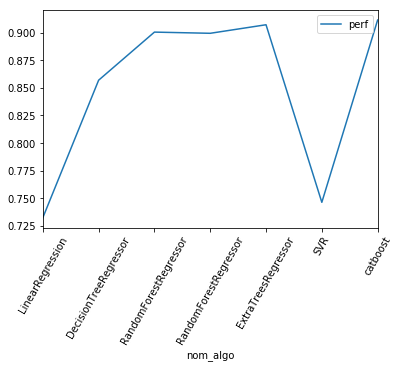

In [908]:
df[["perf"]].plot(kind='line', rot=60)

## Aller au delà des hyperparamètres par défaut d'un modèle avec GridSearch

mieux d'utiliser n_jobs=-1 si plusieurs CPU pour paralléliser

Par défaut scikit-learn optimise les hyperparamètres tout en faisant une **cross-validation**. Sans celle-ci, c’est comme si le modèle optimisait ses coefficients sur la base d’apprentissage et ses hyperparamètres sur la base de test. De ce fait, toutes les données servent à optimiser un paramètre. La cross-validation limite en **vérifiant la stabilité de l’apprentissage sur plusieurs découpages**. On peut également découper en train / test / validation mais cela réduit d’autant le nombre de données pour apprendre.

Stackoverflow : 
- All estimators in scikit where name ends with CV perform cross-validation. But you need to keep a separate test set for measuring the performance.

- So you need to split your whole data to train and test. Forget about this test data for a while.

- And then pass this train data only to grid-search. GridSearch will split this train data further into train and test to tune the hyper-parameters passed to it. And finally fit the model on the whole train data with best found parameters.

- Now you need to test this model on the test data you kept aside in the beginning. This will give you the near real world performance of model.

- If you use the whole data into GridSearchCV, then there would be leakage of test data into parameter tuning and then the final model may not perform that well on newer unseen data.



In [832]:
from sklearn import grid_search

In [833]:
hyperparametres_possibles = {
    'C'     : [0.5, 1, 1.5],
    'gamma' :[0.5, 0.1, 0.15]
}
grid = grid_search.GridSearchCV(estimator=svm.SVR(), 
                                param_grid=hyperparametres_possibles, 
                                n_jobs=-1, cv=10, verbose=2)

### ON ENTRAINE TOUJOURS LA GRILLE SUR LES DONNÉES D'ENTRAINEMENT !

In [834]:
grid.fit(X_train, y_train) 

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] C=0.5, gamma=0.5 ................................................
[CV] C=0.5, gamma=0.5 ................................................
[CV] C=0.5, gamma=0.5 ................................................
[CV] C=0.5, gamma=0.5 ................................................
[CV] C=0.5, gamma=0.5 ................................................
[CV] C=0.5, gamma=0.5 ................................................
[CV] C=0.5, gamma=0.5 ................................................
[CV] C=0.5, gamma=0.5 ................................................
[CV] ....................................... C=0.5, gamma=0.5 -   0.0s
[CV] ....................................... C=0.5, gamma=0.5 -   0.0s
[CV] ....................................... C=0.5, gamma=0.5 -   0.0s
[CV] C=0.5, gamma=0.5 ................................................
[CV] ....................................... C=0.5, gamma=0.5 -   0.0s
[CV] C=0.5, gamm

[CV] ......................................... C=1, gamma=0.5 -   0.0s
[CV] ...................................... C=0.5, gamma=0.15 -   0.0s
[CV] ........................................ C=1, gamma=0.15 -   0.0s
[CV] C=1, gamma=0.15 .................................................
[CV] C=1.5, gamma=0.5 ................................................
[CV] ......................................... C=1, gamma=0.1 -   0.0s
[CV] C=1.5, gamma=0.1 ................................................
[CV] C=1, gamma=0.15 .................................................
[CV] C=1.5, gamma=0.15 ...............................................
[CV] C=1, gamma=0.5 ..................................................
[CV] C=1.5, gamma=0.1 ................................................
[CV] ....................................... C=1.5, gamma=0.1 -   0.0s
[CV] C=1.5, gamma=0.1 ................................................
[CV] ...................................... C=1.5, gamma=0.15 -   0.0s
[CV] .

[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.4s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [0.5, 1, 1.5], 'gamma': [0.5, 0.1, 0.15]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [835]:
dir(grid)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_estimator_type',
 '_fit',
 '_get_param_names',
 'best_estimator_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'fit_params',
 'get_params',
 'grid_scores_',
 'iid',
 'inverse_transform',
 'n_jobs',
 'param_grid',
 'pre_dispatch',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'refit',
 'score',
 'scorer_',
 'scoring',
 'set_params',
 'transform',
 'verbose']

In [836]:
grid.grid_scores_

[mean: 0.22374, std: 0.10757, params: {'C': 0.5, 'gamma': 0.5},
 mean: 0.48645, std: 0.12892, params: {'C': 0.5, 'gamma': 0.1},
 mean: 0.43267, std: 0.13127, params: {'C': 0.5, 'gamma': 0.15},
 mean: 0.34845, std: 0.13209, params: {'C': 1, 'gamma': 0.5},
 mean: 0.60342, std: 0.12992, params: {'C': 1, 'gamma': 0.1},
 mean: 0.55903, std: 0.13321, params: {'C': 1, 'gamma': 0.15},
 mean: 0.42076, std: 0.13797, params: {'C': 1.5, 'gamma': 0.5},
 mean: 0.64370, std: 0.12544, params: {'C': 1.5, 'gamma': 0.1},
 mean: 0.60802, std: 0.13092, params: {'C': 1.5, 'gamma': 0.15}]

In [837]:
grid.best_params_

{'C': 1.5, 'gamma': 0.1}

In [838]:
grid.best_estimator_

SVR(C=1.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [839]:
grid.best_score_

0.6436951562472683

### on peut alors réutiliser ce best estimator en le réentrainant sur l'ensemble de X_train et pas un subset de X_train 

In [842]:
model = svm.SVR(C=1.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [843]:
model.fit(X_train, y_train)

SVR(C=1.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [844]:
model.score(X_test, y_test)

0.642923260068228

performance proche du split

### à tâton pour trouver le meilleur modèle 

In [197]:
hyperparametres_possibles = {
    'C'     : [1.5, 2, 2.5],
    'gamma' :[0.01, 0.05, 1]
}
grid = grid_search.GridSearchCV(estimator=svm.SVR(), 
                                param_grid=hyperparametres_possibles, 
                                n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_score_
grid.best_params_

{'C': 2.5, 'gamma': 0.05}

In [198]:
hyperparametres_possibles = {
    'C'     : [2.5, 3, 3.5],
    'gamma' :[0.01, 0.05, 1]
}
grid = grid_search.GridSearchCV(estimator=svm.SVR(), 
                                param_grid=hyperparametres_possibles, 
                                n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_score_
grid.best_params_

{'C': 3.5, 'gamma': 0.05}

In [200]:
hyperparametres_possibles = {
    'C'     : [3.5, 4, 5, 6],
    'gamma' :[0.01, 0.05, 1]
}
grid = grid_search.GridSearchCV(estimator=svm.SVR(), 
                                param_grid=hyperparametres_possibles, 
                                n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_score_, grid.best_params_

(0.7501429622074626, {'C': 6, 'gamma': 0.05})

In [201]:
hyperparametres_possibles = {
    'C'     : [ 6, 8, 10],
    'gamma' :[0.01, 0.05, 1]
}
grid = grid_search.GridSearchCV(estimator=svm.SVR(), 
                                param_grid=hyperparametres_possibles, 
                                n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_score_, grid.best_params_

(0.7741648460590741, {'C': 10, 'gamma': 0.05})

In [202]:
hyperparametres_possibles = {
    'C'     : [ 10, 15, 20],
    'gamma' :[0.01, 0.05, 1]
}
grid = grid_search.GridSearchCV(estimator=svm.SVR(), 
                                param_grid=hyperparametres_possibles, 
                                n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_score_, grid.best_params_

(0.7872540631505356, {'C': 15, 'gamma': 0.05})

## Assess model stability (Using Bootstrap)

In [909]:
from sklearn.utils import resample

In [910]:
resample(X, y, n_samples = 2, replace=True)

[array([[  9.72418,   0.     ,  18.1    ,   0.     ,   0.74   ,   6.406  ,
          97.2    ,   2.0651 ,  24.     , 666.     ,  20.2    , 385.96   ,
          19.52   ],
        [  9.32909,   0.     ,  18.1    ,   0.     ,   0.713  ,   6.185  ,
          98.7    ,   2.2616 ,  24.     , 666.     ,  20.2    , 396.9    ,
          18.13   ]]), array([17.1, 14.1])]

In [940]:
def Simulation(algorithme, nb_simulations=100):
    from sklearn.utils import resample
    from sklearn.model_selection import train_test_split
    ## where we store all scores from simulations
    scores = []
    for i in range(nb_simulations): 
        ## Resample with replacement in all dataset
        Xboot, yboot = resample(X, y, n_samples = np.size(X,axis=0), replace=True)
        ## Split in Train, Test (0.75/0.25) and compute score
        scores.append(get_score(algorithme, *train_test_split(Xboot, yboot), display_options=False))
    return scores

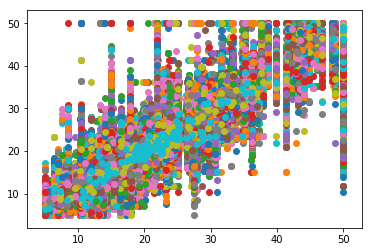

In [941]:
scores_decision_trees = Simulation(DecisionTreeRegressor(), nb_simulations=1000)
scores_rf = Simulation(RandomForestRegressor(), nb_simulations=1000)

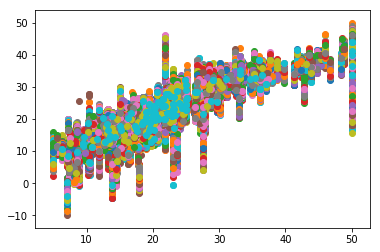

In [955]:
scores_linear_regression_OLS = Simulation(LinearRegression(), nb_simulations=1000)

In [963]:
from sklearn.linear_model import ElasticNet

In [983]:
def grid_search_best_score(algorithme, hyperparametres):
    from sklearn.grid_search import GridSearchCV
    grid = GridSearchCV(algorithme, param_grid=hyperparametres, scoring='r2', n_jobs=-1)
    grid.fit(X_train, y_train)
    return grid.best_score_, grid.best_estimator_

In [984]:
hyperparametres = {'alpha':[1.0], 'l1_ratio':[0.5]}
grid_search_best_score(ElasticNet(), hyperparametres)

(0.5956117516254986,
 ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
       max_iter=1000, normalize=False, positive=False, precompute=False,
       random_state=None, selection='cyclic', tol=0.0001, warm_start=False))

In [985]:
hyperparametres = {'alpha':np.linspace(0.1,0.9,50), 'l1_ratio':np.linspace(0.1,0.9,50)}
grid_search_best_score(ElasticNet(), hyperparametres)

(0.6702507466626036,
 ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.1,
       max_iter=1000, normalize=False, positive=False, precompute=False,
       random_state=None, selection='cyclic', tol=0.0001, warm_start=False))

In [986]:
hyperparametres = {'alpha':np.linspace(0.01,0.1,10), 'l1_ratio':np.linspace(0.01,0.1,10)}
grid_search_best_score(ElasticNet(), hyperparametres)

(0.6724032245604442,
 ElasticNet(alpha=0.030000000000000006, copy_X=True, fit_intercept=True,
       l1_ratio=0.01, max_iter=1000, normalize=False, positive=False,
       precompute=False, random_state=None, selection='cyclic', tol=0.0001,
       warm_start=False))

In [993]:
hyperparametres = {'alpha':np.linspace(0.025, 0.035,10), 'l1_ratio':[0.001]}
grid_search_best_score(ElasticNet(), hyperparametres)

(0.6724353550037506,
 ElasticNet(alpha=0.03388888888888889, copy_X=True, fit_intercept=True,
       l1_ratio=0.001, max_iter=1000, normalize=False, positive=False,
       precompute=False, random_state=None, selection='cyclic', tol=0.0001,
       warm_start=False))

/Users/lucbertin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/lucbertin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lucbertin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lucbertin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: 

Text(0.5,1,'Boostrap procedure to assess model stability')

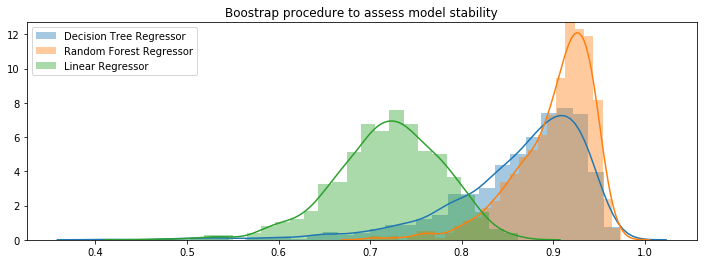

In [1001]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=1)
sns.distplot(scores_decision_trees, ax=ax)
sns.distplot(scores_rf, ax=ax)
sns.distplot(scores_linear_regression_OLS, ax=ax)
plt.legend(["Decision Tree Regressor", "Random Forest Regressor", "Linear Regressor"])
plt.title("Boostrap procedure to assess model stability")
#sns.distplot(scores_elasticnet, ax=ax)

In [948]:
np.mean(scores_decision_trees), np.mean(scores_rf)

(0.8612410198975281, 0.9013224912294563)

In [949]:
np.std(scores_decision_trees), np.std(scores_rf)

(0.07729192919704085, 0.04278521561719852)

# Fin.